In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'text.color':'white'})
import nltk
%matplotlib inline
df_fcc = pd.read_csv("./comcast_fcc_complaints_2015.csv")

df_fcc.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description
0,250635,Comcast Cable Internet Speeds,4/22/2015,3:53:50 PM,Internet,Abingdon,Maryland,21009,Closed,No,I have been contacting Comcast Internet Techni...
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Back in January 2015 I made 2 payments: One fo...
2,242732,Speed and Service,4/18/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Our home is located at in Acworth Georgia 3010...
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast in the Atlanta area has just put into ...
4,307175,Comcast not working and no service to boot,5/26/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,I have been a customer of Comcast of some sort...


In [2]:
print(df_fcc.shape)

(2225, 11)


In [24]:
import re
xtrain =[]
ytrain =[]
ytrainDecIn =[]
ytrainDecOut =[]
for caseID in range(df_fcc.shape[0]):
    out = df_fcc['Description'][caseID].split('Follow-up message by FCC')
    inputString = re.sub(r"[^A-Za-z0-9.$ ]",'', out[0]).lower() + '\n'
    inputString = re.sub(r"[0-9]",'# ', inputString)
    xtrain += [inputString]
    ytrain += [re.sub(r"[^A-Za-z0-9.$ ]",'', df_fcc['Customer Complaint'][caseID]).lower()]
    ytrainDecIn += ['\t' + re.sub(r"[^A-Za-z0-9.$ ]",'', df_fcc['Customer Complaint'][caseID]).lower()]
    ytrainDecOut += [re.sub(r"[^A-Za-z0-9.$ ]",'', df_fcc['Customer Complaint'][caseID]).lower() + '\n']
    
print(xtrain[:1])
print(ytrain[:1])

vocab = set()
vocab |=set(('\t','\n'))
for word in xtrain + ytrain:
    vocab |=set(word.split(' '))
vocab = sorted(vocab)
print(vocab)


['i have been contacting comcast internet technical support for the last # #  months to resolve slow internet speed issues with no permanent resolution. they have also sent techs to my residence and replaced hardware. i pay an additional monthly fee for these services and have not received them. when i speak to management they are very arrogant and rude. their tone is demeaning and unapologetic. a resolution to my problem is never reached. most of the time i get hung up on or experience long hold times. my complaint is that i have been paying for services that i am not receiving. i pay for high speed internet boost internet speeds reliable service and acceptable technical support and i do not receive any of the above. i feel like i have been duped into paying for these services without actually receiving them. i can accurately say that for the last # #  months i have paid $# #  a month for high speed internet and have not received anything remotely close to high speed internet. every t

In [16]:
print(vocab)

{'', '30', 'pay', 'problem.', 'provide', 'wife', 'fee', 'area', 'right.\n', 'between', 'slower', 'off.', 'cap', 'confirmed', 'least', 'website.', 'ticket', 'good', 'sent', 'offered', 'investigation', 'account.', 'ranges', 'some', 'fraud', 'complaint', 'legal', 'given', 'hung', 'high', 'completed.', 'sending', 'issues.', 'means', 'gave', 'est', 'capped', 'missed', '8', 'starting', 'that', 'with', '11.99mbps', 'seek', '$60', 'site.', 'strong', 'committing', 'already', 'due.', 'infrastructure', 'month', '4', 'promised.', 'whole', 'current', 'atlanta', 'apparently', 'more', 'rate', 'updated', 'whatever', 'units', 'competition', 'hardware', 'meeting', 'extremely', 'xfinity', 'treat', 're', 'thursday', 'told', 'customer', 'for', 'run', 'contacting', 'this', 'done', 'line.', 'csr', 'issues', 'no', 'techs', 'afternoon', '25mbps', 'still', 'minutes', 'receiving', 'placed', 'department.', 'stop', 'account', 'lack', '50mbps.', 'other', 'back.', 'signed', 'did', 'hardware.', 'internet', 'residence

In [98]:
print(ytrainDecIn[0])
print(sqrTtIn[0])
print(ytrainDecOut[0])
print(sqrTtOut[0])

	comcast cable internet speeds
[77, 54, 17, 117]
comcast cable internet speeds

[9, 54, 17, 1313]


In [96]:
tokenizer.word_index['speed']

65

In [78]:
sqrTtOut[:5]

[[8, 54, 19],
 [261, 5687, 12, 165],
 [68, 4, 4313],
 [8, 1433, 5, 82, 190, 130, 11, 412, 9, 6761, 441, 27],
 [8, 18, 244, 4, 26, 12, 3]]

In [57]:
MAX_SEQUENCE_LENGTH = 400
datatr = pad_sequences(sqrTr , maxlen=MAX_SEQUENCE_LENGTH,padding='pre')
datatt = pad_sequences(sqrTt, maxlen=15,padding='post')
story_maxlen = max(map(len, datatr))
print('Shape of data tensor:', datatr1.shape)
print(datatt[0])
print(sqrTr[0])
len(tokenizer.word_index)
print(story_maxlen)

Shape of data tensor: (2225, 400)
[  8  53  19 124   0   0   0   0   0   0   0   0   0   0   0]
[1, 13, 41, 1001, 8, 19, 588, 276, 7, 2, 152, 281, 98, 3, 271, 284, 19, 67, 123, 23, 26, 3134, 429, 15, 13, 102, 222, 718, 3, 6, 722, 4, 874, 1378, 1, 74, 43, 262, 191, 119, 7, 200, 79, 4, 13, 18, 108, 56, 36, 1, 273, 3, 1540, 15, 37, 163, 3404, 4, 687, 38, 2485, 14, 4398, 4, 6932, 5, 429, 3, 6, 111, 14, 88, 823, 318, 11, 2, 50, 1, 46, 400, 34, 20, 49, 738, 457, 301, 101, 6, 130, 14, 9, 1, 13, 41, 104, 7, 79, 9, 1, 40, 18, 346, 1, 74, 7, 206, 67, 19, 1541, 19, 124, 833, 12, 4, 1178, 588, 276, 4, 1, 55, 18, 223, 103, 11, 2, 704, 1, 324, 131, 1, 13, 41, 5273, 177, 104, 7, 200, 79, 139, 341, 346, 56, 1, 85, 2133, 306, 9, 7, 2, 152, 281, 98, 1, 13, 229, 548, 5, 51, 7, 206, 67, 19, 4, 13, 18, 108, 287, 2048, 579, 3, 206, 67, 19, 159, 50, 1, 13, 253, 8, 1, 13, 202, 22, 632, 739, 9, 1, 40, 18, 346, 2, 79, 1, 40, 104, 7, 4, 8, 856, 3, 35, 17, 7, 2, 79, 1, 40, 18, 346]
400


In [58]:
tokenizer.word_index['\n']

KeyError: '\n'

In [11]:
from wordcloud import WordCloud, STOPWORDS

list_stops = ('comcast','time','customer','even','now','company',
            'day','someone','thing','also','got','way','call','called','one','said','tell','service')

for word in list_stops:
    STOPWORDS.add(word)

In [18]:
df_fcc['Customer Complaint'].value_counts()

Comcast                                                                                                                                              83
Comcast Internet                                                                                                                                     18
Comcast Data Cap                                                                                                                                     17
comcast                                                                                                                                              13
Data Caps                                                                                                                                            11
Comcast Billing                                                                                                                                      11
Comcast Data Caps                                                                       

In [19]:
from wordcloud import STOPWORDS
common_complaints = df_fcc['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('comcast','now','company','day','someone','thing','also','got','way','call','called','one','said','tell')

for word in list_stops:
    STOPWORDS.add(word)
    

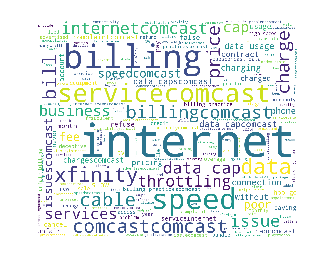

In [20]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()